In [1]:
from sklearn.preprocessing import StandardScaler 
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import itertools as it
from sklearn.preprocessing import StandardScaler
import random

In [2]:
data_train = read_csv("data_mnist.csv")
data_test = read_csv("test_mnist.csv")
y = data_train["label"]
X = data_train.iloc[:,1:]
X = X/255
results = list()
start, end, step = 100,11000,100
for i in range(start, end, step):
    logistic = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=i,n_jobs=-1)
    score = np.mean(cross_val_score(logistic,X,y,scoring='accuracy',n_jobs=-1,cv=5))
    results.append(score)


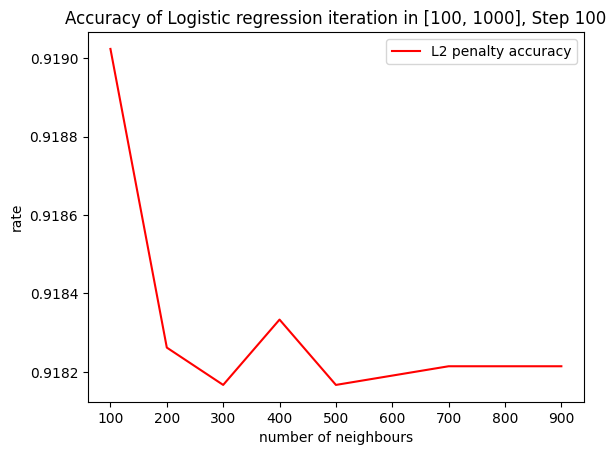

In [3]:
x_axix = range(start, end, step)
plt.title('Accuracy of Logistic regression iteration in ['+str(start)+', '+str(end)+'], Step '+str(step))
plt.plot(x_axix, results, color='red', label='L2 penalty accuracy')
plt.legend() # 显示图例
plt.xlabel('number of neighbours')
plt.ylabel('rate')
plt.show()
df=DataFrame(results)
df.to_csv('problem4.csv')   

In [4]:
df=DataFrame(results)
df.to_csv('problem4.csv')

In [5]:
logistic = LogisticRegression(multi_class="multinomial",solver='lbfgs',max_iter=800,n_jobs=-1)
logistic.fit(X,y)
print(logistic.n_iter_)

[706]


In [7]:
data_test = read_csv('test_mnist.csv')
result = logistic.predict(data_test)
pre_df = DataFrame({'ImageId':range(1,len(data_test)+1),'Label':result})
pre_df.to_csv('mnist.csv',index=None)